In [ ]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

## 구글 드라이브와 연동시키기
매번 연결을 시도하게 되면 이전에 구축한 모델 그리고 데이터가 사라진다

이를 방지하기 위해서 구글 드라이브와 연동하는 방법을 먼저 배워보자


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)

cpu


## train_DS 그리고 test_DS 구경하기

train Data Set

test Data Set

In [ ]:
# import한 transforms 모듈에서 가지고 온다
transform = transforms.ToTensor()
train_DS = datasets.MNIST(root = '/content/drive/MyDrive/Colab Notebooks/data', train=True, download=True, transform=transform)
test_DS = datasets.MNIST(root = '/content/drive/MyDrive/Colab Notebooks/data', train=False, download=True, transform=transform)

In [ ]:
print(train_DS)
print(test_DS)

# Data 개수만 알고 싶을 때 - len()
print(len(train_DS)) # 60000
print(len(test_DS)) # 10000

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/Colab Notebooks/data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: /content/drive/MyDrive/Colab Notebooks/data
    Split: Test
    StandardTransform
Transform: ToTensor()
60000
10000


In [ ]:
train_DS.classes # 어떤 클래스가 존재하는지를 확인한다

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [ ]:
train_DS.class_to_idx # Labeling을 확인할 수 있다

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [ ]:
train_DS.data.shape # 들어간 데이터의 shape 확인 - 60000 28 28 형태

torch.Size([60000, 28, 28])

In [ ]:
train_DS.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

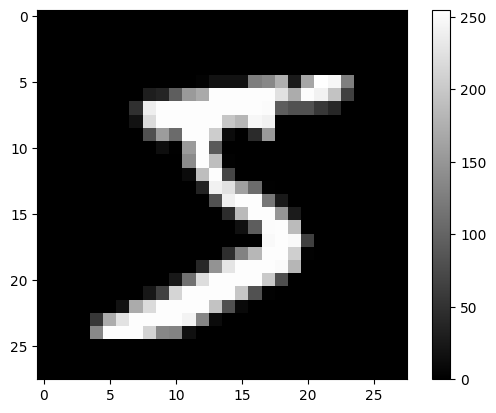

In [ ]:
plt.imshow(train_DS.data[0], cmap = "gray") # color map - cmap으로 표현
plt.colorbar()

In [ ]:
print(train_DS.targets)
print(train_DS.targets.shape) # [60000]

tensor([5, 0, 4,  ..., 5, 6, 8])
torch.Size([60000])


## DataLoader를 살펴보자

데이터를 가지고 와서 랜덤으로 셔플해야 한다 - SGD를 예로 생각하면 편함


In [ ]:
BATCH_SIZE = 32
train_DL = torch.utils.data.DataLoader(train_DS, batch_size=BATCH_SIZE, shuffle=True)
test_DL = torch.utils.data.DataLoader(test_DS, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
print(len(train_DL.dataset)) # DataLoader 개수 확인하고 싶을 때는 .dataset 하고 len() 활용해야 함

60000


<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.uint8
torch.float32


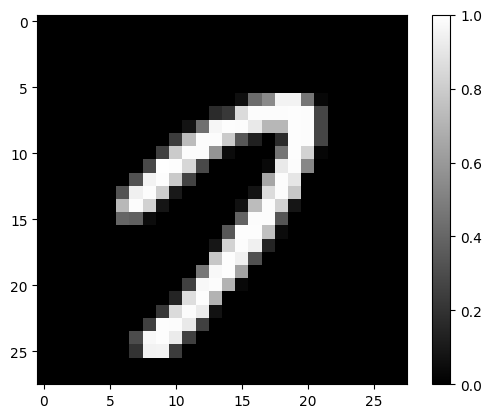

In [ ]:
# Data Loader를 사용하는 방법
# 데이터 한 국자 뜨는 방법 (batch_size 만큼 뜬다) - x_batch, y_batch 로 생각(데이터, 라벨링 모두 뜬다)
# batch_size 만큼 데이터를 뜨기도 하지만 동시에 transform 함수를 통과시켜서 준다!!!
x_batch, y_batch = next(iter(train_DL))

# type 비교 - 현재는 Tensor 데이터로 큰 차이가 없지만 다른 데이터의 경우 다르게 출력된다 (추후 보여줌)
print(type(train_DS.data))
print(type(x_batch))

# [32,1,28,28] - 개 채 행 열로 파악해야 한다
print(x_batch.shape)
# [32]
print(y_batch.shape)

# squeeze() 하는 이유 -> 1, 28, 28 인데 인식 불가 - squeeze 하면 28 28 형태로 변환
# 흑백으로 인식하기 위해서 2차원 형태의 이미지 행렬로 구성해야 imshow()가 동작할 수 있다
plt.imshow(x_batch[0].squeeze(), cmap="gray")
plt.colorbar()

print(train_DL.dataset.data.dtype) # uint8 (정수 형태)
print(x_batch.dtype) # float 32 (float으로 변환)

# ToTensor 의 역할
# 1. tensor로 바꿔준다
# 2. 개 채 행 열로 변환한다 (60000 28 28 -> 32 1 28 28)로 변환해준다 - 채가 없어서 넣어주는 모습
# 3. 0~1 사이로 바꿔준다 (int -> float)


## STEP 2 본격적으로 모델을 만들자

먼저 MLP 형태부터 만들어보겠습니다

In [ ]:
from torch import nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear = nn.Sequential(nn.Linear(28*28, 100), # 28 x 28 행렬의 input data (하나하나를 모두 픽셀로)
                                     nn.ReLU(),
                                     nn.Linear(100,10)) # 0 - 9 까지의 확률을 출력해야 하니까 (출력해야 하는 값 종류 생각하기)

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.linear(x)
        return x

In [ ]:
# flatten 확인
x_batch, _ = next(iter(train_DL))
print(x_batch.shape)
flat_images = torch.flatten(x_batch)
print(flat_images.shape)
flat_images2 = torch.flatten(x_batch, start_dim=2)
print(flat_images2.shape)

torch.Size([32, 1, 28, 28])
torch.Size([25088])
torch.Size([32, 1, 784])


In [ ]:
model = MLP()
print(model)
x_batch, _ = next(iter(train_DL))

print(x_batch.shape) # 32 1 28 28
print(model(x_batch).shape)

MLP(
  (linear): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)
torch.Size([32, 1, 28, 28])
torch.Size([32, 10])


## 모델 전체적으로 세팅하기

In [ ]:
# 지난 Binary Classification에서 사용한 모델을 가지고 왔다
from torch import optim

# Hyper parameter setting (lr, EPOCH 변경)
LR = 1e-3
EPOCH = 5
# 주로 많이 사용하는 방법 (더 많이 사용하는 방법이다 - 일반적이고 더 많이 사용한다)
criterion = nn.CrossEntropyLoss()

def Train(model, train_DL, criterion, optimizer):
    loss_history = []
    NoT = len(train_DL.dataset)

    model.train() # train mode로 변경

    for ep in range(EPOCH):
        rloss = 0 # running loss
        for x_batch, y_batch in train_DL:
            # GPU 메모리로 올려주기 위해 to(DEVICE) 명시하기
            x_batch = x_batch.to(DEVICE)
            y_batch = y_batch.to(DEVICE)
            # inference
            y_hat = model(x_batch)
            # loss
            loss = criterion(y_hat, y_batch)
            # update - 여러번 반복하면서 고인 곳으로 이동하게 만든다
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # loss accumulation (loss는 현재 평균을 냈기 때문에 x_batch.shape[0] - 개수를 곱하는 것임)
            # batch_size로 하지 않는 이유 - drop_last 관련, 즉 마지막 국자를 생각해야 한다
            loss_b = loss.item() * x_batch.shape[0]
            rloss += loss_b

        # print loss
        loss_e = rloss / NoT
        loss_history += [loss_e]
        print(f"Epoch: {ep+1}, train loss : {round(loss_e, 3)}")
        print("-" * 20)
    return loss_history

## CROSS ENTROPY 확인

왜 SOFTMAX 함수를 포함하지 않았을까
- nn.CrossEntropyLoss 내부에 이미 SOFTMAX를 최종적으로 통과한 결과를 가지고 있기 때문이다

In [ ]:
import torch.nn.functional as F
from torch import nn

y_hat = torch.randn(3,5)
print(y_hat)
y_batch = torch.randint(5,(3,))
print(y_batch)

loss = F.cross_entropy(y_hat, y_batch)
print(loss)

criterion = nn.CrossEntropyLoss()
print(criterion(y_hat, y_batch))

# 확률 분포 형태로 변환한다 by softmax 함수
y_hat_soft = F.softmax(y_hat, dim=1)
print(y_hat_soft)

# 직접 구하기
loss=0

for i, val in enumerate(y_hat_soft):
    # data를 하나씩 가지고 와서 CE를 계산한다
    # CE는 레이블을 하나씩 확인하고 각각의 값을 더한다 (-log 한 값을 더해주는 셈이다)
    print(i, val)
    print(val[y_batch[i]])
    loss += -torch.log(val[y_batch[i]])

print(loss)
# print(loss / y_hat_soft.shape[0]) # 기본적으로 제공하는 CE 함수는 디폴트로 평균을 구하기 때문이다

tensor([[-1.2375,  0.2203, -0.0164,  0.5040,  1.3492],
        [-0.5839,  1.2118,  0.7327,  1.9508, -1.5328],
        [ 2.1638, -0.5348,  0.3627,  0.8385, -0.7209]])
tensor([3, 1, 2])
tensor(1.7311)
tensor(1.7311)
tensor([[0.0361, 0.1552, 0.1225, 0.2061, 0.4800],
        [0.0421, 0.2536, 0.1571, 0.5310, 0.0163],
        [0.6435, 0.0433, 0.1063, 0.1710, 0.0360]])
0 tensor([0.0361, 0.1552, 0.1225, 0.2061, 0.4800])
tensor(0.2061)
1 tensor([0.0421, 0.2536, 0.1571, 0.5310, 0.0163])
tensor(0.2536)
2 tensor([0.6435, 0.0433, 0.1063, 0.1710, 0.0360])
tensor(0.1063)
tensor(5.1932)


## 모델을 학습시켜보자



In [ ]:
model = MLP().to(DEVICE) # GPU 환경을 활용하기 위함 (batch, model 모두 GPU환경에서 동작!)
optimizer = optim.Adam(model.parameters(), lr=LR)
loss_history = Train(model, train_DL, criterion, optimizer)

plt.plot(range(1, EPOCH+1), loss_history)
plt.xlabel('epoch')
plt.ylabel('loss')

## 모델 저장하기 & 불러오기

In [ ]:
save_model_path = "/content/drive/MyDrive/Colab Notebooks/resultsByMe/MLP_MNIST.pt"
torch.save(model.state_dict(), save_model_path)
model.state_dict()

In [ ]:
save_model_path = "/content/drive/MyDrive/Colab Notebooks/resultsByMe/MLP_MNIST.pt"
load_model = MLP().to(DEVICE)
load_model.load_state_dict(torch.load(save_model_path, map_location=DEVICE))

<All keys matched successfully>

## 모델 테스트하기


In [ ]:
#model.to(DEVICE)

def Test(model, test_DL):
    model.eval()
    with torch.no_grad():
        r_correct = 0
        for x_batch, y_batch in test_DL:
            x_batch = x_batch.to(DEVICE)
            y_batch = y_batch.to(DEVICE)
            # inference
            y_hat = model(x_batch)
            # Accuracy Accumulation
            pred = y_hat.argmax(dim=1)
            # Model의 예측 - pred / y_batch 실제 정답지
            # 예측과 실제 정답지 사이를 비교해야 한다는 뜻이 되겠다
            corrects_b = torch.sum(pred == y_batch).item()
            r_correct += corrects_b

        accuracy_e = r_correct / len(test_DL.dataset) * 100
    print(f"Test accuracy: {r_correct}/{len(test_DL.dataset)} ({round(accuracy_e,1)} %)")

Test accuracy: 9749/10000 (97.5 %)


In [ ]:
# Test 하는 모델도 함수로 정의
# 추후에도 계속 사용할 것이기 때문이다
Test(load_model, test_DL)

In [ ]:
# 그림 그리는 용도의 함수이다

def Test_plot(model, test_DL):
    model.eval()
    with torch.no_grad():
        x_batch, y_batch = next(iter(test_DL))
        x_batch = x_batch.to(DEVICE)
        y_hat = model(x_batch)
        pred = y_hat.argmax(dim=1)

    x_batch = x_batch.to("cpu")

    plt.figure(figsize=(8,4))
    for idx in range(6):
        plt.subplot(2,3, idx+1, xticks=[], yticks=[]) # ticks 구간을 빈 공간 - 옆에 수치, 눈금을 제거함
        plt.imshow(x_batch[idx].permute(1,2,0).squeeze(), cmap="gray") # 행열채로 변경하기 위함
        pred_class = test_DL.dataset.classes[pred[idx]]
        true_class = test_DL.dataset.classes[y_batch[idx]]
        plt.title(f"{pred_class} ({true_class})", color = "g" if pred_class==true_class else "r")

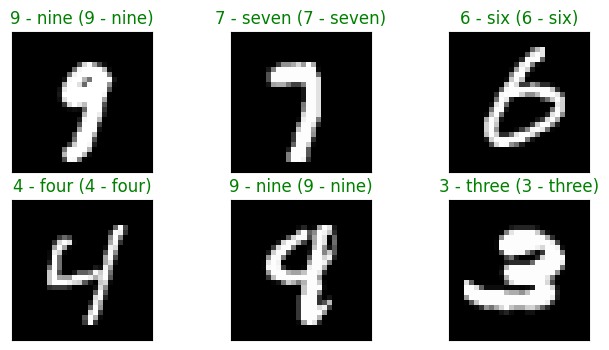

In [ ]:
Test_plot(load_model, test_DL)

In [ ]:
# 파라미터 수 구하기
def count_params(model):
    num = sum([p.numel() for p in model.parameters() if p.requires_grad])
    return num

In [ ]:
print(count_params(load_model))

79510
